In [117]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [118]:
df = pd.read_csv('coaster_db.csv')

In [119]:
df.shape

(1087, 56)

In [120]:
df.head(5)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [121]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [122]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


### Data prepration

In [123]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [124]:
df = df[['coaster_name',
    # 'Length', 'Speed',
    'Location',
    #'Status', 'Opening date',
    'Manufacturer',
    # 'Height restriction', 'Model', 'Height',
    # 'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
    # 'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
    # 'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
    # 'Track layout', 'Fastrack available', 'Soft opening date.1',
    # 'Closing date',
    'Opened',
    'Replaced by',
    # 'Website',
    # 'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
    # 'Single rider line available', 'Restraint Style',
    # 'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
    'year_introduced',
    'latitude',
    'longitude',
    'Type_Main',
    'opening_date_clean',
    # 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
    'speed_mph',
    # 'height_value', 'height_unit',
    'height_ft',
    'Inversions_clean', 'Gforce_clean']].copy()

In [125]:
df.columns

Index(['coaster_name', 'Location', 'Manufacturer', 'Opened', 'Replaced by',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed_mph', 'height_ft', 'Inversions_clean',
       'Gforce_clean'],
      dtype='object')

In [126]:
df.dtypes

coaster_name           object
Location               object
Manufacturer           object
Opened                 object
Replaced by            object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [127]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

   df['opening_date_clean']

In [128]:
df['opening_date_clean']

0      1884-06-16
1      1895-01-01
2             NaT
3      1901-01-01
4      1901-01-01
          ...    
1082          NaT
1083   2022-01-01
1084   2016-06-16
1085          NaT
1086   2022-01-01
Name: opening_date_clean, Length: 1087, dtype: datetime64[ns]

In [129]:
# rename the columns
df.rename(columns= {'coaster_name':'Coaster Name',
                    'year_introduced':'Year Introduced',
                    'latitude': 'Latitude',
                    'longitude':'Longitude',
                    'Type_Main':'Type Main',
                    'opening_date_clean':'Opening Date Clean',
                    'speed_mph':'Speed MPH',
                    'height_ft':'Height FT',
                    'Inversions_clean':'Inversions Clean',
                    'Gforce_clean':'Gforce Clean'}, inplace=True)

In [130]:
df.head()

,Coaster Name,Location,Manufacturer,Opened,Replaced by,Year Introduced,Latitude,Longitude,Type Main,Opening Date Clean,Speed MPH,Height FT,Inversions Clean,Gforce Clean
0,Switchback Railway,Coney Island,LaMarcus Adna Thompson,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Lina Beecher,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",NaN,1895,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Edwin Prescott,NaN,Giant Racer,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Edwin Prescott,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [131]:
drop_list = {'Opened', 'Replaced by','Gforce Clean'}
df.drop(drop_list, axis=1, inplace = True)
df.isna().sum()

Coaster Name            0
Location                0
Manufacturer           59
Year Introduced         0
Latitude              275
Longitude             275
Type Main               0
Opening Date Clean    250
Speed MPH             150
Height FT             916
Inversions Clean        0
dtype: int64

In [132]:
df.loc[df.duplicated()]

,Coaster Name,Location,Manufacturer,Year Introduced,Latitude,Longitude,Type Main,Opening Date Clean,Speed MPH,Height FT,Inversions Clean


In [133]:
df.loc[df.duplicated(subset = ['Coaster Name'])].head()

,Coaster Name,Location,Manufacturer,Year Introduced,Latitude,Longitude,Type Main,Opening Date Clean,Speed MPH,Height FT,Inversions Clean
43,Crystal Beach Cyclone,Crystal Beach Park,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0
60,Derby Racer,Revere Beach,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0
167,Big Thunder Mountain Railroad,Other,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0


Text(0.5, 0, 'Count')

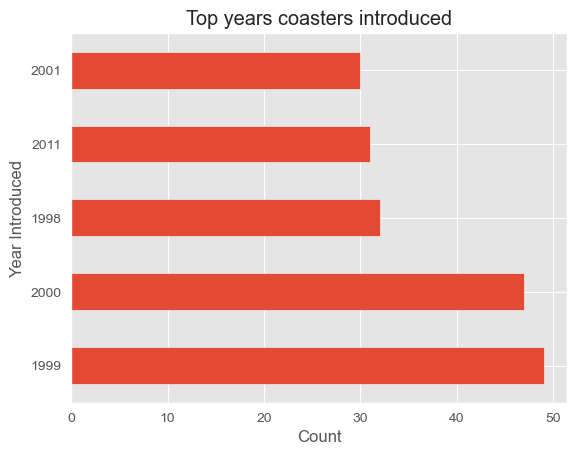

In [134]:
ax = df['Year Introduced'].value_counts() \
        .head() \
        .plot(kind= 'barh', title = 'Top years coasters introduced')
ax.set_ylabel('Year Introduced')
ax.set_xlabel('Count')

Text(0.5, 0, 'speed in mph')

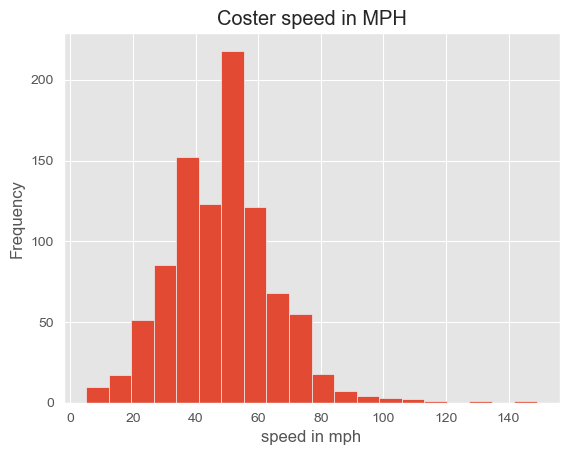

In [135]:
ax = df['Speed MPH'].plot(kind='hist', bins = 20, title='Coster speed in MPH')
ax.set_xlabel('speed in mph')

/Users/ghanshyam/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


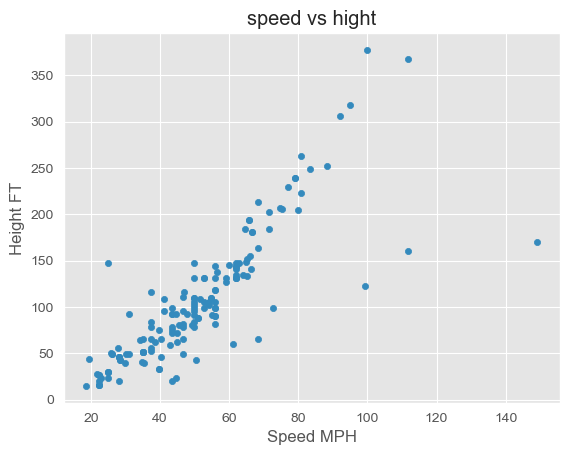

In [136]:
df.plot(kind='scatter', x = 'Speed MPH', y ='Height FT', title= 'speed vs hight')
plt.show()

In [137]:
df.columns

Index(['Coaster Name', 'Location', 'Manufacturer', 'Year Introduced',
       'Latitude', 'Longitude', 'Type Main', 'Opening Date Clean', 'Speed MPH',
       'Height FT', 'Inversions Clean'],
      dtype='object')

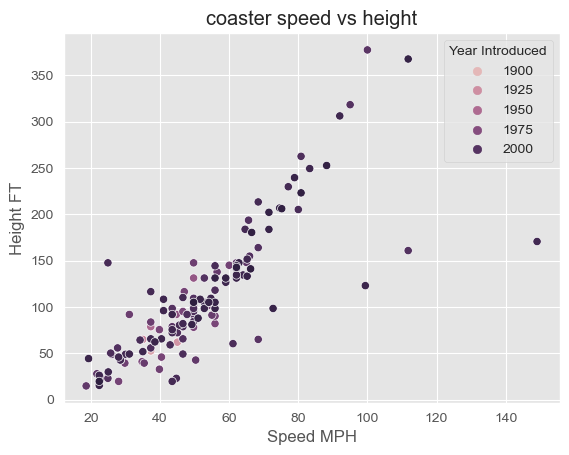

In [138]:
ax = sns.scatterplot(x = 'Speed MPH', y ='Height FT', data= df, hue = 'Year Introduced')
ax.set_title('coaster speed vs height')
plt.show()

/Users/ghanshyam/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


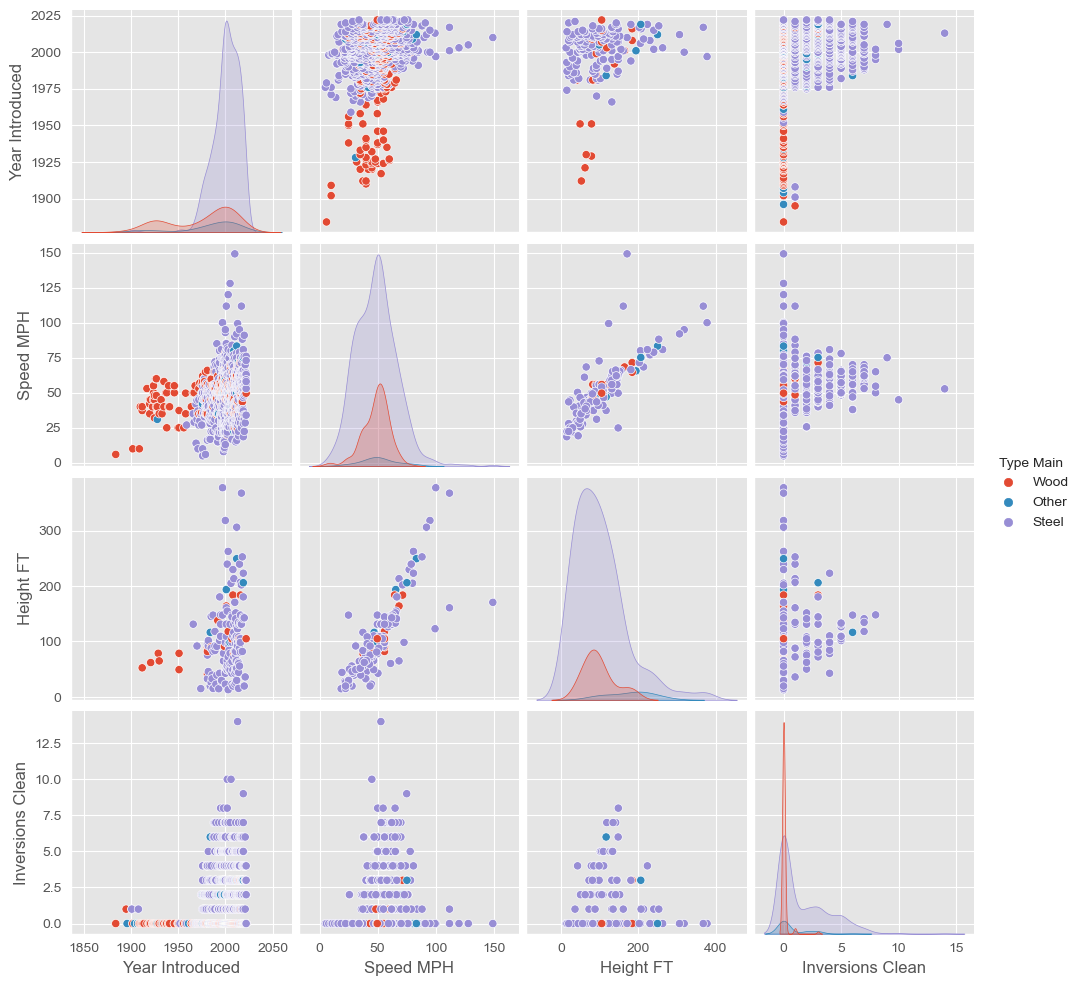

In [139]:
sns.pairplot(df, vars = ['Year Introduced','Speed MPH', 'Height FT', 'Inversions Clean'],  hue ='Type Main')
plt.show()

In [140]:
df_corr = df[['Year Introduced','Speed MPH', 'Height FT', 'Inversions Clean']].dropna().corr()
df_corr

,Year Introduced,Speed MPH,Height FT,Inversions Clean
Year Introduced,1.000000,0.246314,0.252420,0.109344
Speed MPH,0.246314,1.000000,0.829404,0.159502
Height FT,0.252420,0.829404,1.000000,0.132756
Inversions Clean,0.109344,0.159502,0.132756,1.000000


<Axes: >

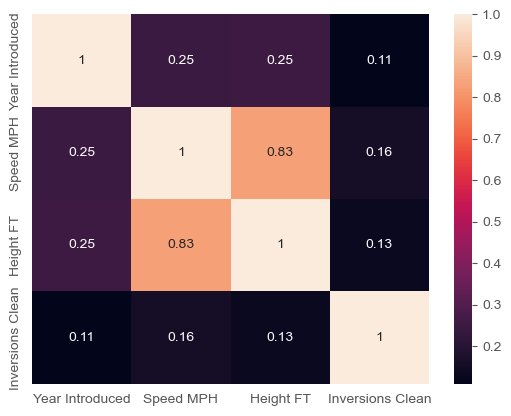

In [141]:
sns.heatmap(df_corr, annot = True)

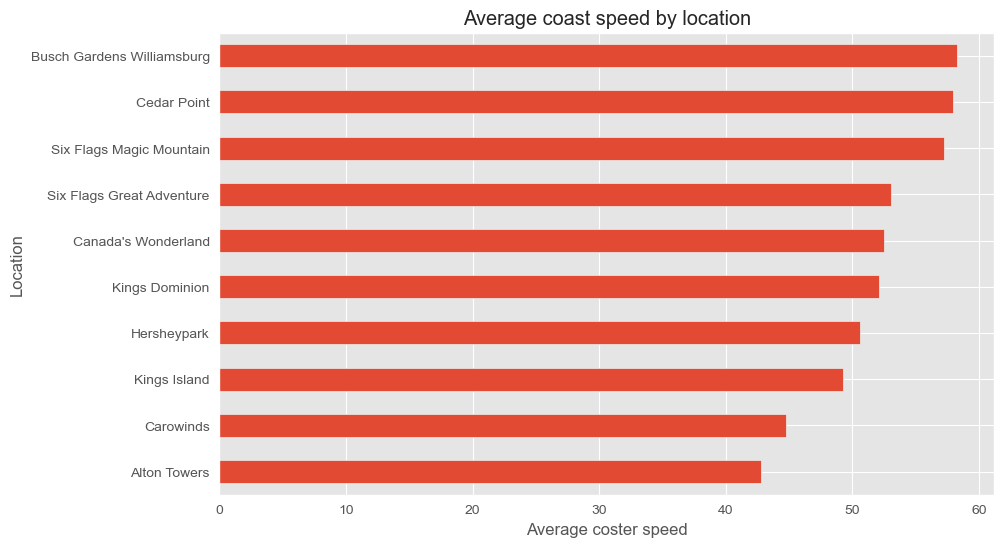

In [147]:
ax = df.query('Location != "Other"').groupby('Location')['Speed MPH'].agg(['mean', 'count']).query('count>=10').sort_values('mean')['mean'].plot(kind='barh', figsize=(10,6), title='Average coast speed by location')
ax.set_xlabel('Average coster speed')
plt.show()